<center>
<h1>Univariate Linear Regression on the Scikit-Learn Diabetes Dataset</h1>
<h2>Practical Lab 3 </h2><center>
Submitted by Beena Kurian(student ID: 8946601)


<h3>OBJECTIVE</h3>

<ul>
<li>To use Univariate Linear Regression model on the scikit learn diabetes dataset. </li>
<li>Compute the slope(m) and y-intercept(b) will be determined from the data through statistical techniques.</li>
<li>To find the best-fit line that describes the relationship between BMI and disease progression.</li>
</ul>

In [214]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  

<font color="navyblue">
<h4>1. Frame the problem and look at the big picture</h4>
</font>

This regression analysis is between 2 variables: 

Body Mass Index(referred to as "diabetes_X" in the code) as the independent variable and 

A quantitative measure of disease progression one year after baseline (referred to as "diabetes_y" in the code) as the dependent variable


<font color="navyblue">
<h4>2. Get the data.</h4>
</font>

From sklearn import datasets and then load diabetes dataset

In [215]:

# to load the diabetes dataset from scikit-learn while simultaneously splitting it into two parts:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [216]:
#To display few rows of diabetes_X DataFrame
print(diabetes_X.head())

        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [217]:
#To display few rows of diabetes_y DataFrame
print(diabetes_y.head())

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


From diabetes_X DataFrame, we need to extract the bmi column only as an independent variable

In [218]:
# extracting the independent variable bmi from diabetes_X and then reshape it
bmi_feature = diabetes_X['bmi']
X = bmi_feature.values.reshape(-1,1)
y = diabetes_y

<font color="navyblue">
<h4>3. Explore the data to gain insights.</h4>
</font>

It involves investigating and visualizing the dataset to better understand its characteristics, patterns, and relationships between variables

In [219]:
print(X.shape)
print(y.shape)


(442, 1)
(442,)


<h5> Plotting histogram and Caluculating mean, median, standard deviation, minimum and maximum values of independent variable-to get insights about bmi</h5>

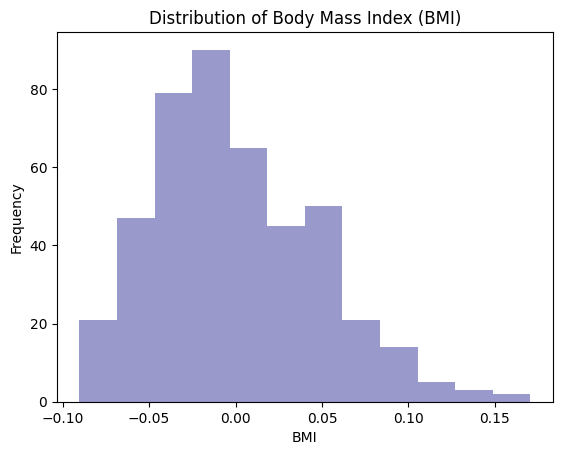

Mean: -2.2455642172282577e-16
Median: -0.007283766209687899
Standard Deviation: 0.0475651494154494
Minimum Value: -0.09027529589850945
Maximum Value: 0.17055522598064407


In [220]:
plt.hist(X,color="navy",alpha=0.4, bins= 12)
plt.title("Distribution of Body Mass Index (BMI)")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()
print("Mean:", np.mean(X))
print("Median:", np.median(X))
print("Standard Deviation:", np.std(X))
print("Minimum Value:", np.min(X))
print("Maximum Value:", np.max(X))


<ul>
<li>Mean (Average): The mean value being very close to zero, the values in the dataset are very close to zero. 
In a balanced dataset, the mean is often close to zero.</li>

<li>Median (Middle Value): The median value is also close to zero, indicating that the dataset has a roughly symmetrical distribution. 
The median is less sensitive to extreme outliers compared to the mean.</li>

<li>Standard Deviation: The standard deviation measures the spread or dispersion of the data. A smaller standard deviation suggests that the data points are relatively close to the mean, indicating lower variability in the dataset.</li>

<li>Minimum Value: The minimum value (-0.0903) represents the lowest data point in the dataset.
</li>

<li>Maximum Value: The maximum value (0.1706) represents the highest data point in the dataset.</li>

<h5>Visualize the relationship between independent variable(bmi) and dependent variable(disease progression) using scatter plot</h5>

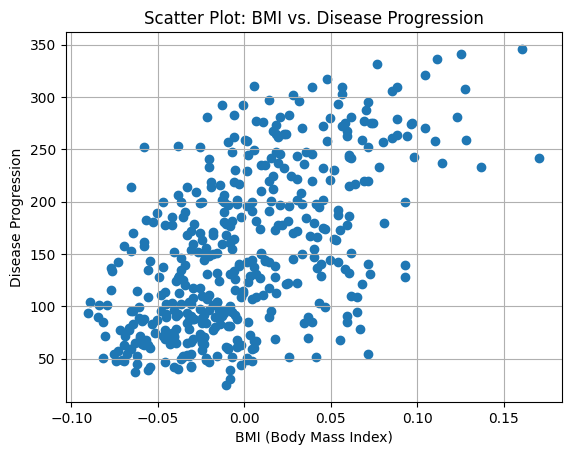

In [221]:
# Create a scatter plot
plt.scatter(X, y)
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("Disease Progression")
plt.title("Scatter Plot: BMI vs. Disease Progression")
plt.grid(True)  
plt.show()


In this scatter plot, each data point represents a data sample. The points are scattered upward from left to right indicates a positive correlation between BMI (Body Mass Index) and Disease Progression. This means that as BMI increases, Disease Progression tends to increase as well.

In [222]:
correlation_matrix = np.corrcoef([bmi_feature, y])
print(correlation_matrix)

[[1.         0.58645013]
 [0.58645013 1.        ]]


The off-diagonal elements (top-right and bottom-left) represent the correlation between bmi and disease progression(X and y). 

This value is between -1 and 1 and indicates the strength and direction of the linear relationship between x and y.
<ul>
<li>A value of 1.0 would indicate a perfect positive linear relationship, meaning that as one variable increases, the other increases proportionally.</li>
<li>A value of -1.0 would indicate a perfect negative linear relationship, meaning that as one variable increases, the other decreases proportionally.
</li>
<li>A value close to 0 (as in this case) indicates a relatively weak linear relationship.
</li>
</ul>

Here, bmi and disease progression, variables have a positive correlation of approximately 0.586.
The correlation is not perfect but indicates a moderate positive linear relationship between the two variables.

<font color="navyblue">
<h4>4. Fine-tune your models and combine them into a great solution.</h4>
</font>

In [223]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,diabetes_y, test_size=0.2, random_state=0)
# Train the model
model = LinearRegression()  
model.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The coefficients
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [981.65543614]
Intercept: 
 152.28824927379569


5. Present your solution.

Mean Squared Error: 4150.68
Mean Absolute Error: 52.94


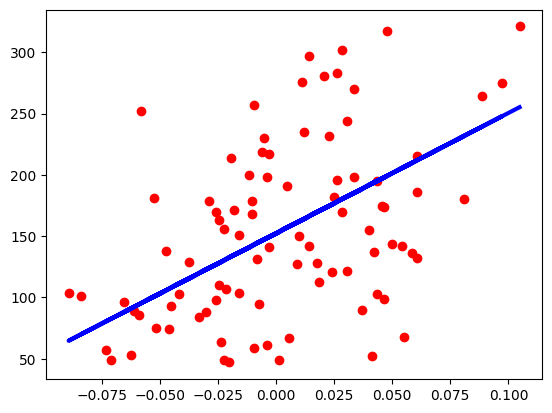

In [224]:
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()